<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.polytechnique.edu/sites/all/institutionnel/institutpolytechniqueparis_logohorizontal.png" width="90%"> </td>
     <td style="background-color:transparent;">
<img border="0" src="" width="60%"> </td>
  </tr>
</table> 
</div>
<center><h1>Arabic News Category Prediction Challenge (ANCP)</h1></center>
<br/>
<center>Ahmad CHAMMA, Hadi ABDINE, Youssef FARHAT</center>

## Table of Contents

0. [Introduction](#Introduction)
1. [Business Model](#Business-Model)
2. [KPI and Metric](#KPI-and-Metric)
3. [Data](#Data)

# Introduction

**Why is Natural Language Processing important?**

*A computer could be considered intelligent if it could carry on a conversation with a human being without the human realizing they were talking to a machine.<br>-Alan Turing*

By "natural language" we mean a language that is used for communication by humans. By combining the power of artificial intelligence, computational linguistics and computer science, Natural Language Processing (NLP) helps machines to understand the natural language and communicate with humans in their own language.

<img src="files/NLP.png" width="400">

With the ongoing growth of the World Wide Web and social media, there is a drastic increase in online data. As the amount of data increases the mechanisms to process these unstructured data and to extract meaningful information from it becomes more challenging, simply because computers traditionally work with precise, unambiguous and highly structured languages such as programming languages, however, the natural language is often ambiguous and the linguistic structure can depend on many complex variables, including slang, regional dialects and social context. And that is why the development of advanced NLP techniques has been a major topic of research in the last decade. 

With NLP, ambiguity in language can be resolved and it adds useful numeric structure to the previously unstructed data.From then, sky is the limit on what can be done and the applications that can be developed. For example, NLP makes it possible for computers to read text, translate it, hear speech, interpret it, measure sentiment and determine which parts are important, and that is just tip of the iceberg.

# Business Model

In this project we are going to be looking into Arabic Natural Language Processing (ANLP). Arabic is the fifth most talked language in the world and is considered as the official language in 26 countries which qualifies it to be an important langauge. Because of that, a lot of textual data written in arabic language is generated whether it's from socail media, a news website or google searches etc... Also, Arabic in its standard form, known as Modern Standard Arabic (MSA), is one of the 6 official languages of the United Nations.

Despite its importance and significance in the world, it has yet to have a major breakthrough in the NLP applications. Arabic has received comparatively little attention in modern computational linguistics. It is indeed a challenging topic due to the complexity of the language, its rich morphology, as well as the presence many different dialects. But with the constant advancement in the NLP field, as well as deep learning and big data, and with proper research and dedication, the creation of a great ANLP model will be considered a breakthrough in the computational liguistics.

What we proposed in this project is to predict the category of the arabic news using an nlp model, whether it's local news, international, sports related etc... A simple way to benefit from this is to use it, for example, to categorize the huge amount of data coming from Twitter and thus it will be much easier for a client to find the news related to his category in mind.

# KPI and Metric

This predictive model can be integrated in any news providing medium. Some of the benefits and KPIs to help us track the impact of this project:
<ul>
  <li>Trending category shown at first</li>
  <li>Number of users or visits to the medium</li>
  <li>User Satisfaction with the medium integrated</li>
</ul>

The metric that we used to evaluate our performance in the **F1 SCORE**.

# Data

As mentioned before, arabic text data is hard to be found, and rare to find one already categorized so, the data that we will be using throughout the project is collected from a Lebanese news website www.lebanonfiles.com . This site contains all sorts of news such as economical, political news ... and what made this part challenging is that we had to extract the data ourselves in order to use it.

The data collected:
<ul>
    <li>Id: integer, identifier for the news</li>
    <li>Title: string, title of the news which can tell a lot about the category</li>
    <li>Date: date type, but written in arabic</li>
    <li>Desc: string, description of the news</li>
    <li>Image: string, some news may contain an image</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import datetime
import dateutil.parser as dparser
import nltk
from nltk.corpus import stopwords
import unicodedata as ud
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.impute import SimpleImputer
sns.set()
%matplotlib inline

In [2]:
from problem import get_train_data
X_df, y_array = get_train_data()

In [3]:
X_df.head(5)

,Id,Title,Date,Desc,Image
0,1313318,تكريم الشاعر موسى زغي ورئيس الجمهورية قلده وسا...,الخميس 12 نيسان 2018 - 15:37,\n\r\n\tكرمت جامعة الروح القدس - الكسليك وجامع...,http://www.lebanonfiles.com/files/images/12-04...
1,1413607,نائب معارض لمادورو: حزب الله يستثمر منجمين للذ...,الاثنين 14 كانون الثاني 2019 - 15:58,\n\n\tكشف نائب معارض للرئيس الفنزويلي نيكولاس ...,http://www.lebanonfiles.com/files/images/14-01...
2,1363260,هكذا استغل داعش الأطفال في هجمات الشيشان,الخميس 23 آب 2018 - 07:29,\n\n\tنشر تنظيم داعش مقطع فيديو، الأربعاء، يظه...,http://www.lebanonfiles.com/files/images/23-08...
3,971779,سلام ترأس اجتماعا لخلية الازمة الوزارية,الاثنين 07 كانون الأول 2015 - 18:48,\n\r\n\tترأس رئيس مجلس الوزراء تمام سلام اجتما...,http://www.lebanonfiles.com/files/images/07-12...
4,960499,كنعان: وصلنا الى اتفاق حول اقتراح قانون استعاد...,الأربعاء 11 تشرين الثاني 2015 - 15:01,"\n\r\n\tعقد نواب من ""التيار الوطني الحر"" والمس...",http://www.lebanonfiles.com/files/images/11-11...


In [4]:
length = int(len(X_df) / 10)

In [5]:
X_df = X_df[:length]
y_array = y_array[:length]

### Convert the arabic date to datetime format

In [6]:
def convert_to_date(x):
    dicta =  {"كانون الثاني": "january" ,"شباط": "february", "أيار": "may",  "نيسان": "April",
         "آذار": "march", "حزيران": "june", "تموز": "july", "آب": "august", "أيلول": "september",
         "تشرين الأول": "october", "تشرين الثاني": "november", "كانون الأول": "december",
         "الاثنين": "monday", "الثلاثاء": "tuesday", "الأربعاء": "wednesday", "الخميس": "thursday", "الجمعة": "friday",
         "السبت": "saturday", "الأحد": "sunday", "السبت": "saturday"}
    x_new = x
    for arabic, english in dicta.items():
        x_new = x_new.replace(arabic, english)
    x_new = dparser.parse(x_new, fuzzy=True)
    return x_new

In [7]:
X_df['Date'] = X_df.Date.apply(convert_to_date)
X_df.head(3)

,Id,Title,Date,Desc,Image
0,1313318,تكريم الشاعر موسى زغي ورئيس الجمهورية قلده وسا...,2018-04-12 15:37:00,\n\r\n\tكرمت جامعة الروح القدس - الكسليك وجامع...,http://www.lebanonfiles.com/files/images/12-04...
1,1413607,نائب معارض لمادورو: حزب الله يستثمر منجمين للذ...,2019-01-14 15:58:00,\n\n\tكشف نائب معارض للرئيس الفنزويلي نيكولاس ...,http://www.lebanonfiles.com/files/images/14-01...
2,1363260,هكذا استغل داعش الأطفال في هجمات الشيشان,2018-08-23 07:29:00,\n\n\tنشر تنظيم داعش مقطع فيديو، الأربعاء، يظه...,http://www.lebanonfiles.com/files/images/23-08...


In [8]:
X_df.shape

(11640, 5)

In [9]:
# proportion of NaN values
X_df.isna().sum() / X_df.shape[0]

Id       0.000000
Title    0.000000
Date     0.000000
Desc     0.000515
Image    0.037113
dtype: float64

In [10]:
# number of unique values
X_df.nunique()

Id       11640
Title    11616
Date     11582
Desc     11634
Image    11182
dtype: int64

In [11]:
X_df.dtypes

Id                int64
Title            object
Date     datetime64[ns]
Desc             object
Image            object
dtype: object

In [12]:
X_df.describe(include='all')

,Id,Title,Date,Desc,Image
count,1.164000e+04,11640,11640,11634,11208
unique,NaN,11616,11582,11634,11182
top,NaN,الدفاع المدني: مهمات إنقاذ وإسعاف وإخماد حرائق...,2015-08-27 16:50:00,"\n\n\tكشفت مصادر مطلعة للـ""أم تي في""، أن ""رئيس...",http://www.lebanonfiles.com/files/images/10-02...
freq,NaN,12,2,1,3
first,NaN,NaN,2015-06-21 12:24:00,NaN,NaN
last,NaN,NaN,2020-01-15 08:25:00,NaN,NaN
mean,1.282918e+06,NaN,NaN,NaN,NaN
std,2.243605e+05,NaN,NaN,NaN,NaN
min,9.000080e+05,NaN,NaN,NaN,NaN
25%,9.982312e+05,NaN,NaN,NaN,NaN


### Histogram of the classes

In [13]:
categories = ['أخبار محليّة', 'أخبار فنية', 'أخبار اقتصادية ومالية', 'أخبار رياضية', 'أخبار إقليمية ودولية']
class2index = dict(zip(categories, range(len(categories))))

In [14]:
y_array = np.array([class2index[cat] for cat in y_array])

(array([7147.,    0.,  842.,    0.,    0.,  946.,    0.,  745.,    0.,
        1960.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

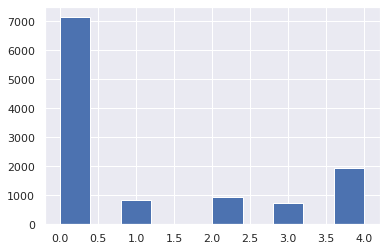

In [15]:
plt.hist(y_array)

#### As we can see the data is unbalanced so as scorer we use the F1 Score as scorer dor our challenge

### Naive fill for the "Desc" Column

In [16]:
X_df['Desc'] = X_df['Desc'].astype('str')
X_df.loc[X_df['Desc']=='', 'Desc'] = X_df['Title']

In [17]:
X_df.head(3)

,Id,Title,Date,Desc,Image
0,1313318,تكريم الشاعر موسى زغي ورئيس الجمهورية قلده وسا...,2018-04-12 15:37:00,\n\r\n\tكرمت جامعة الروح القدس - الكسليك وجامع...,http://www.lebanonfiles.com/files/images/12-04...
1,1413607,نائب معارض لمادورو: حزب الله يستثمر منجمين للذ...,2019-01-14 15:58:00,\n\n\tكشف نائب معارض للرئيس الفنزويلي نيكولاس ...,http://www.lebanonfiles.com/files/images/14-01...
2,1363260,هكذا استغل داعش الأطفال في هجمات الشيشان,2018-08-23 07:29:00,\n\n\tنشر تنظيم داعش مقطع فيديو، الأربعاء، يظه...,http://www.lebanonfiles.com/files/images/23-08...


### Clean the "Desc" and "Title" column (remove \t, weird symbols and stop words)

In [18]:
stps_arabic = set(stopwords.words('arabic'))
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def clean_txt(sent):
    """
        text: a string
        
        return: modified initial string
    """    
    text = sent.strip()
    text = re.sub('[\n\r\t\xa0]', ' ', text)
    text = re.sub(arabic_diacritics, '', text)
    text = ''.join(c for c in text if not ud.category(c).startswith('P') and not c.isdigit())
    res = re.sub(' +', ' ', text)
    return [w for w in text.split() if w not in stps_arabic]

In [19]:
X_df['Title'] = X_df['Title'].apply(clean_txt)
X_df['Desc'] = X_df['Desc'].apply(clean_txt)

In [20]:
X_df.head(3)

,Id,Title,Date,Desc,Image
0,1313318,"[تكريم, الشاعر, موسى, زغي, ورئيس, الجمهورية, ق...",2018-04-12 15:37:00,"[كرمت, جامعة, الروح, القدس, الكسليك, وجامعة, آ...",http://www.lebanonfiles.com/files/images/12-04...
1,1413607,"[نائب, معارض, لمادورو, حزب, الله, يستثمر, منجم...",2019-01-14 15:58:00,"[كشف, نائب, معارض, للرئيس, الفنزويلي, نيكولاس,...",http://www.lebanonfiles.com/files/images/14-01...
2,1363260,"[استغل, داعش, الأطفال, هجمات, الشيشان]",2018-08-23 07:29:00,"[نشر, تنظيم, داعش, مقطع, فيديو, الأربعاء, يظهر...",http://www.lebanonfiles.com/files/images/23-08...


In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
import keras.backend as K

# The maximum number of words to be used. (Most frequent)
vocab_size = 20000

# The padding and truncating types used.
trunc_type = 'post'
padding_type = 'post'

# The OOV token (Out Of Vocabulary) will be included within the dictionary
oov_tok = '<OOV>'

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200

# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_df['Desc'].values)
word_index = tokenizer.word_index

Using TensorFlow backend.


In [22]:
train_sequences = tokenizer.texts_to_sequences(X_df['Desc'])
X = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)

In [23]:
X[10]

array([   35,     7,   157,   583,   135,     6,     3, 11470,  2164,
        1909,  1750,   753,  3424, 12633,    68,   137, 17501,  1750,
        1170,  5496,  5497,  1812,  3132,  4366,  3133,   135,    24,
         224,   526,  2599, 11151,   448,  5099,  1750,   753,  8991,
         166,   292,     9,    65,     1,     7,   135,  5099,  1750,
         753,    98,    50,    89,   630,  2279,  4040,     1,  5173,
          29,  1750,   753,   946,     1,   166,     1,   161, 15261,
        3468,   154,   723,     1,    95,    29,   704,   797,  1647,
         166,     1,     1,     1,  3990,   268,  4366,  2722,     1,
         174,     1,   294,     1,   371,  5252,  1677,  1750,   753,
       17501,  6131,  7574,  6132,   135,     1,  3215,  7891,  6347,
          61,   132,   102,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

## Implementing

In [24]:
id_to_word = {value:key for key,value in word_index.items()}
id_to_word[0] = '<PAD>'
print(' '.join(id_to_word[id] for id in X[10]))
print('---')
print(' '.join(X_df.loc[10]['Desc']))

قال الرئيس الأميركي دونالد ترامب اليوم ان إدارته تجري محادثات كوريا الجنوبية تزيد تمويلها بشكل كبير لحمايتها كوريا الشمالية تصاعد التوترات شبه الجزيرة الكورية وكتب ترامب عبر تويتر مدى العقود العديدة الماضية دفعت كوريا الجنوبية القليل جدا المال العام الماضي <OOV> الرئيس ترامب دفعت كوريا الجنوبية مليون دولار وأضاف بدأت المحادثات لزيادة <OOV> للولايات المتحدة كوريا الجنوبية بلد <OOV> جدا <OOV> الآن بالتزام المساهمة الدفاع العسكري <OOV> الولايات المتحدة العلاقة البلدين جيدة جدا <OOV> <OOV> <OOV> أمني الحرب الكورية انتهت <OOV> وليس <OOV> سلام <OOV> ألف جندي أميركي كوريا الجنوبية لحمايتها تهديدات بيونغ يانغ ترامب <OOV> مرارا تكاليف إبقاء القوات الأميركية البلد <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

## Transform Y_train to one hot encoding

In [25]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(y_array.reshape(-1, 1))
Y_train = enc.transform(y_array.reshape(-1, 1)).toarray()

In [26]:
Y_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Implementing the f1_score function (not integrated in Keras)

In [27]:
def get_f1(y_true, y_pred):
    
    y_true = K.argmax(y_true, -1)
    y_pred = K.argmax(y_pred, -1)
    
    prec_num = 0
    prec_den = 0
    recall_num = 0
    recall_den = 0
    
    equal = K.equal(y_true, y_pred)
    not_equal = K.not_equal(y_true, y_pred)
    
    for i in range(5):
        prec_num += K.sum(K.cast(K.all(K.stack([equal, K.equal(y_true, i)], axis=0), axis=0), 'int32'))
        prec_den += prec_num + K.sum(K.cast(K.all(K.stack([not_equal, K.equal(y_pred, i)], axis=0), axis=0), 'int32'))
        recall_num += prec_num
        recall_den += prec_num + K.sum(K.cast(K.all(K.stack([not_equal, K.equal(y_true, i)], axis=0), axis=0), 'int32'))
        
    prec_num = K.cast(prec_num, 'float')
    prec_den = K.cast(prec_den, 'float')
    recall_num = K.cast(recall_num, 'float')
    recall_den = K.cast(recall_den, 'float')
    
    precision = prec_num / prec_den
    recall = recall_num / recall_den
    f1_val = 2*(precision * recall)/(precision + recall)
    return f1_val

## The model to use

In [28]:
K.clear_session()

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[get_f1])

epochs = 10
batch_size = 64

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 2,080,905
Trainable params: 2,080,905
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.15)

/home/ahmad/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9894 samples, validate on 1746 samples
Epoch 1/10
9894/9894 [==============================] - 102s 10ms/step - loss: 1.1945 - get_f1: 0.2946 - val_loss: 1.1640 - val_get_f1: 0.2949
Epoch 2/10
9894/9894 [==============================] - 94s 10ms/step - loss: 1.0663 - get_f1: 0.3055 - val_loss: 0.9666 - val_get_f1: 0.3319
Epoch 3/10
9894/9894 [==============================] - 91s 9ms/step - loss: 0.9126 - get_f1: 0.3308 - val_loss: 0.8699 - val_get_f1: 0.3483
Epoch 4/10
9894/9894 [==============================] - 91s 9ms/step - loss: 0.9054 - get_f1: 0.3355 - val_loss: 0.9260 - val_get_f1: 0.3360
Epoch 5/10
9894/9894 [==============================] - 90s 9ms/step - loss: 0.8251 - get_f1: 0.3497 - val_loss: 0.8725 - val_get_f1: 0.3508
Epoch 6/10
9894/9894 [==============================] - 91s 9ms/step - loss: 0.7530 - get_f1: 0.3587 - val_loss: 0.8641 - val_get_f1: 0.3533
Epoch 7/10
9894/9894 [==============================] - 91s 9ms/step - loss: 0.7371 - get_f1: 0.3593 - 

In [32]:
model.evaluate(X, Y_train)

11640/11640 [==============================] - 33s 3ms/step


[0.6379385566588529, 0.3775031864643097]

In [33]:
y_pred = model.predict_classes(X)
y_pred

array([4, 4, 4, ..., 4, 0, 3])

In [34]:
np.argmax(Y_train, -1)

array([1, 4, 4, ..., 1, 0, 3])

In [35]:
from problem import get_test_data
X_test, y_test = get_test_data()
X_test['Date'] = X_test['Date'].apply(convert_to_date)
X_test['Title'] = X_test['Title'].astype('str')
X_test['Desc'] = X_test['Desc'].astype('str')

In [36]:
X_test['Title'] = X_test['Title'].apply(clean_txt)
X_test['Desc'] = X_test['Desc'].apply(clean_txt)

In [37]:
test_sequences = tokenizer.texts_to_sequences(X_test['Desc'])
X_test = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)

In [38]:
y_test = np.array([class2index[cat] for cat in y_test])

Y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

In [40]:
model.evaluate(X_test, Y_test)

38804/38804 [==============================] - 111s 3ms/step


[0.8461193945061091, 0.3626594543457031]

In [19]:
from problem import get_train_data
X_df, y_array = get_train_data()
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median'))])

def convert_to_date(x):
    dicta =  {"كانون الثاني": "january" ,"شباط": "february", "أيار": "may",  "نيسان": "April",
        "آذار": "march", "حزيران": "june", "تموز": "july", "آب": "august", "أيلول": "september",
        "تشرين الأول": "october", "تشرين الثاني": "november", "كانون الأول": "december",
        "الاثنين": "monday", "الثلاثاء": "tuesday", "الأربعاء": "wednesday", "الخميس": "thursday", "الجمعة": "friday",
        "السبت": "saturday", "الأحد": "sunday", "السبت": "saturday"}
    x_new = x
    for arabic, english in dicta.items():
        x_new = x_new.replace(arabic, english)
    x_new = dparser.parse(x_new, fuzzy=True)
    return x_new
def process_date(X):
    date = X.Date.apply(convert_to_date)
    return np.c_[date.dt.year, date.dt.month, date.dt.day]
date_transformer = FunctionTransformer(process_date, validate=False)


def clean_txt(sent):
    """
        text: a string
        return: modified initial string
    """    
    stps_arabic = set(stopwords.words('arabic'))
    arabic_diacritics = re.compile("""
                                ّ    | # Tashdid
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatwil/Kashida
                            """, re.VERBOSE)
    sent = str(sent)
    text = sent.strip()
    text = re.sub('[\n\r\t\xa0]', ' ', text)
    text = re.sub(arabic_diacritics, '', text)
    text = ''.join(c for c in text if not ud.category(c).startswith('P') and not c.isdigit())
    res = re.sub(' +', ' ', text)
    return [w for w in text.split() if w not in stps_arabic]

def process_text(X):
    X.loc[X['Desc']=='', 'Desc'] = X['Title']
    X['Title'] = X['Title'].apply(clean_txt)
    X['Desc'] = X['Desc'].apply(clean_txt)
    return np.c_[ X['Title'], X['Desc']]


num_col = ['Id']
date_col = ['Date']
drop_cols = ['Image', 'Title', 'Desc']

non_text_preprocessor = ColumnTransformer(
    transformers=[
        ('date', make_pipeline(date_transformer), date_col),
        ('num', numeric_transformer, num_col),
        ('drop cols', 'drop', drop_cols),
        ])

In [21]:
X_array = non_text_preprocessor.fit_transform(X_df)

In [22]:
X_array

array([[2.018000e+03, 4.000000e+00, 1.200000e+01, 1.313318e+06],
       [2.019000e+03, 1.000000e+00, 1.400000e+01, 1.413607e+06],
       [2.018000e+03, 8.000000e+00, 2.300000e+01, 1.363260e+06],
       ...,
       [2.019000e+03, 2.000000e+00, 2.000000e+00, 1.422303e+06],
       [2.019000e+03, 7.000000e+00, 8.000000e+00, 1.481177e+06],
       [2.019000e+03, 1.000000e+00, 7.000000e+00, 1.410380e+06]])

In [ ]:
process_text(X_df)

In [ ]:
X_df.head(5)